#  load dataset 

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn import metrics

warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(7.5,3.8)})
data = pd.read_csv("diabetic_data.csv")

In [115]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [116]:
data.shape

(101766, 50)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# preprocessing dataset

In [118]:
data.replace("?",np.nan,inplace = True)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
tolazamide            0.000000
glyburide             0.000000
dtype: float64

In [119]:
data = data.drop('weight',1)
data = data.drop('payer_code', 1)
data = data.drop('medical_specialty',1)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

race             2.233555
diag_3           1.398306
diag_2           0.351787
diag_1           0.020636
encounter_id     0.000000
tolazamide       0.000000
glyburide        0.000000
tolbutamide      0.000000
pioglitazone     0.000000
rosiglitazone    0.000000
dtype: float64

In [120]:
print(data['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [121]:
data['race'] = data['race'].fillna('Caucasian')

In [122]:
data['diag_1'] = data['diag_1'].fillna('Unknown')
data['diag_2'] = data['diag_2'].fillna('Unknown')
data['diag_3'] = data['diag_3'].fillna('Unknown')

In [123]:
data.isna().sum().sort_values(ascending = False).head()

encounter_id     0
tolazamide       0
acetohexamide    0
glipizide        0
glyburide        0
dtype: int64

In [124]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [125]:
obj_col = data.columns[data.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object') 
 total number of categorical columns: 34


In [126]:
num_col = data.columns[data.dtypes==int]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index([], dtype='object') 
 total number of numerical columns: 0


In [127]:
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')

In [128]:
data = data.drop('encounter_id',1)
data = data.drop('patient_nbr',1)

In [129]:
data.shape

(101766, 45)

# Train test split

In [130]:
data1 = data.copy()

In [131]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(np.array(data1.index),
                                           train_size=0.8,random_state=41,stratify = data['readmitted'])

In [132]:
train = data1.loc[train_index,:]
test = data1.loc[test_index,:]

In [133]:
y_train = train['readmitted']
y_test = test['readmitted']

In [134]:
train.drop('readmitted',axis = 1,inplace = True)
test.drop('readmitted',axis = 1,inplace = True)

In [135]:
train.shape, test.shape

((81412, 44), (20354, 44))

In [136]:
X_train_1 = train.copy()
y_train_1 = y_train.copy()

In [137]:
X_test_1 = test.copy()
y_test_1 = y_test.copy()

# Initial data analysis

<AxesSubplot:xlabel='readmitted', ylabel='count'>

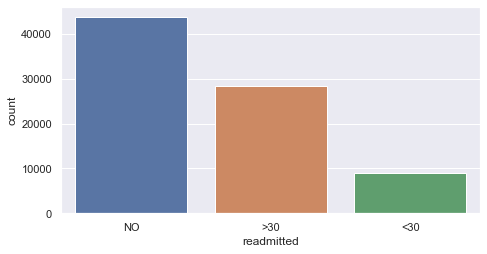

In [138]:
# response
sns.countplot(y_train)
y_train.value_counts()

In [139]:
# replace "NO" and "<30" with 0, ">30" with 1
maps={"NO":1,"<30":0,">30":1}
y_train_1 = y_train_1.map(maps)
y_test_1 = y_test_1.map(maps)

[Text(0.5, 1.0, 'after reclassify')]

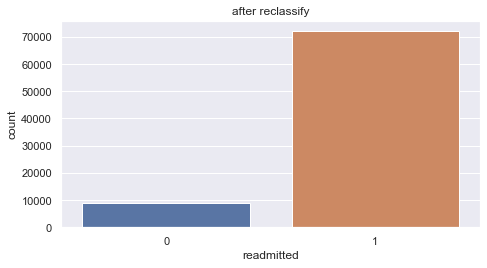

In [140]:
sns.countplot(y_train_1).set(title = 'after reclassify')

In [141]:
y_train_1.value_counts()

1    72327
0     9085
Name: readmitted, dtype: int64

# Explortary data analysis

In [142]:
obj_col = data.columns[data.dtypes==object]
obj_col = obj_col[:-1]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 36


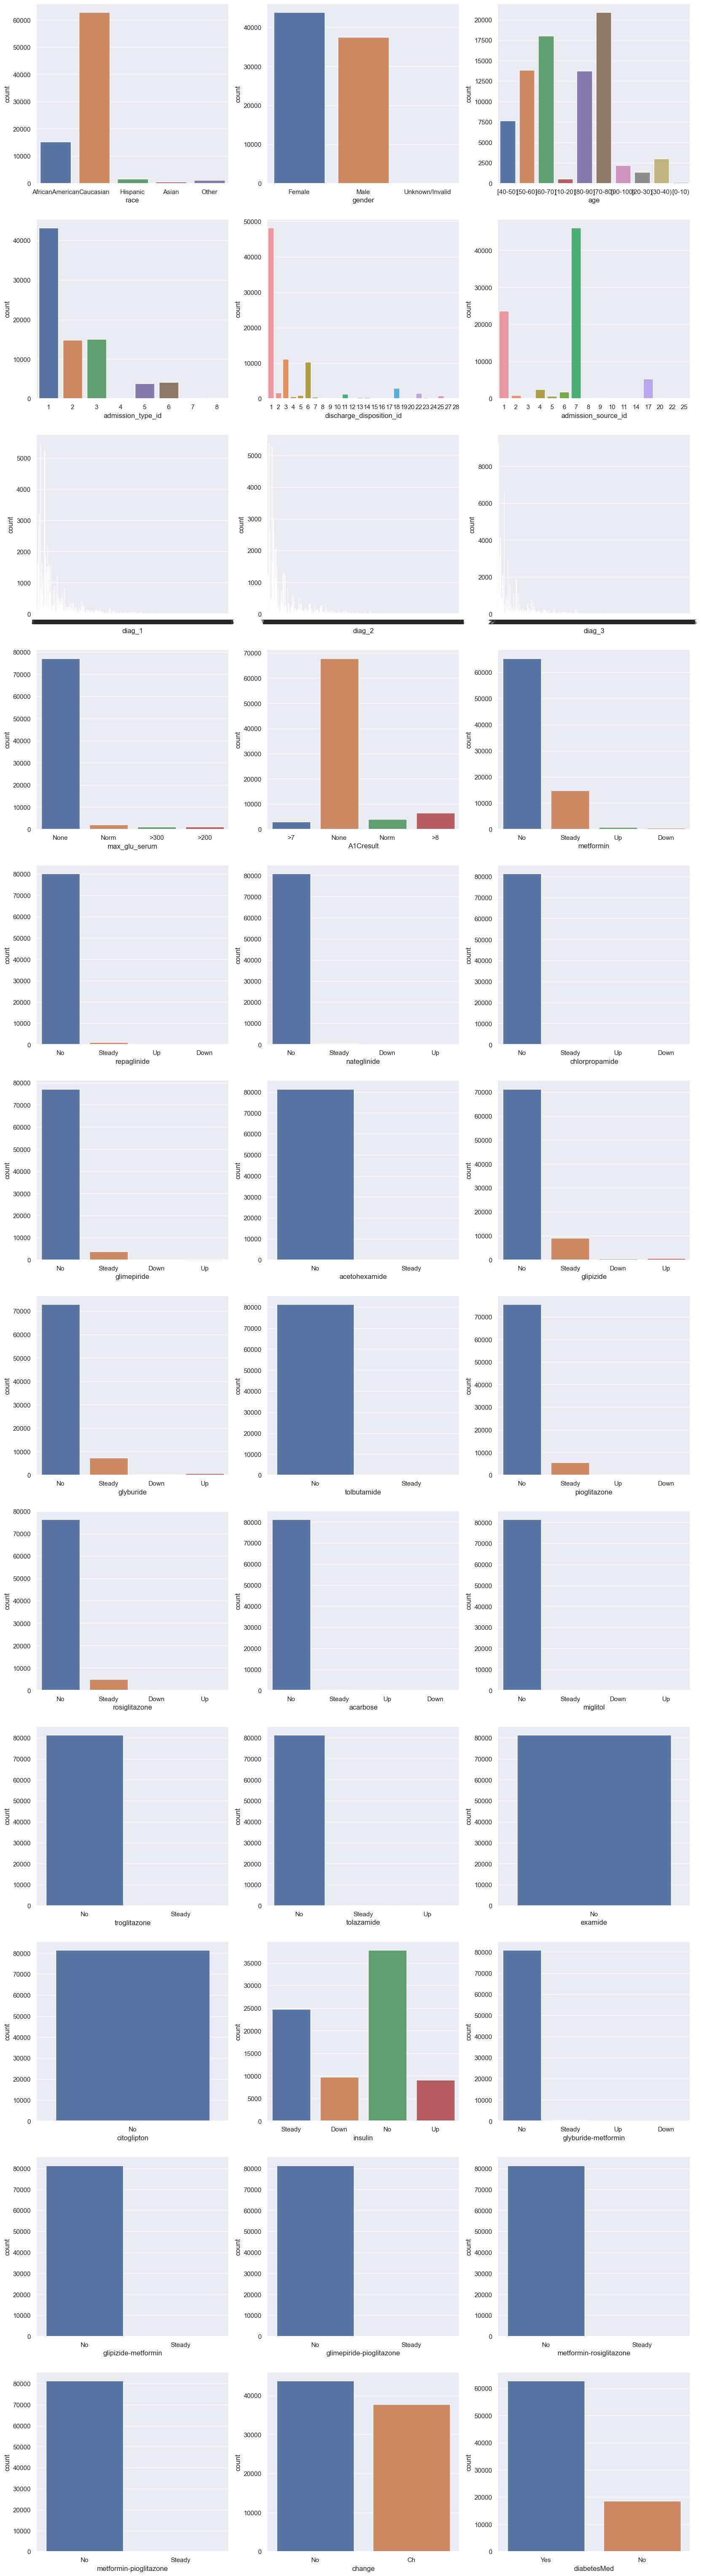

In [143]:
# categorical data - countplot

fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.countplot(x = X_train_1[obj_col[i-1]])

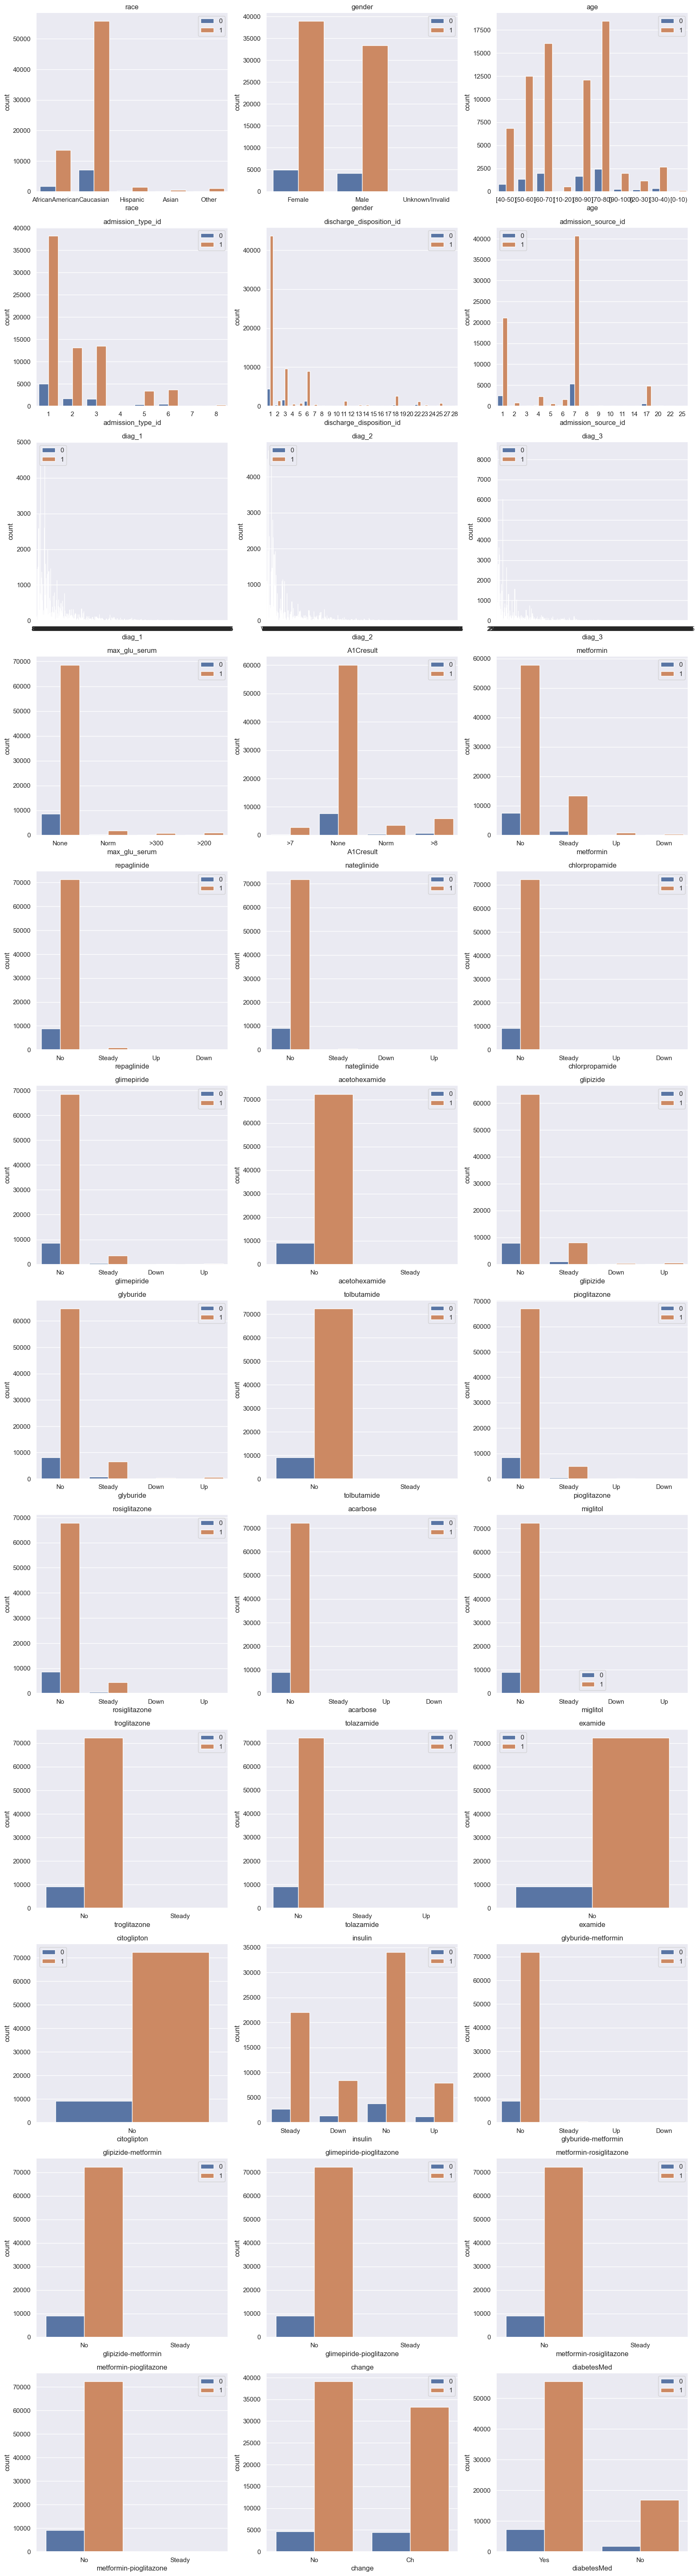

In [144]:
fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.countplot(x = X_train_1[obj_col[i-1]], hue = y_train_1)
    plt.title(obj_col[i-1])
    plt.legend()

In [145]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 8


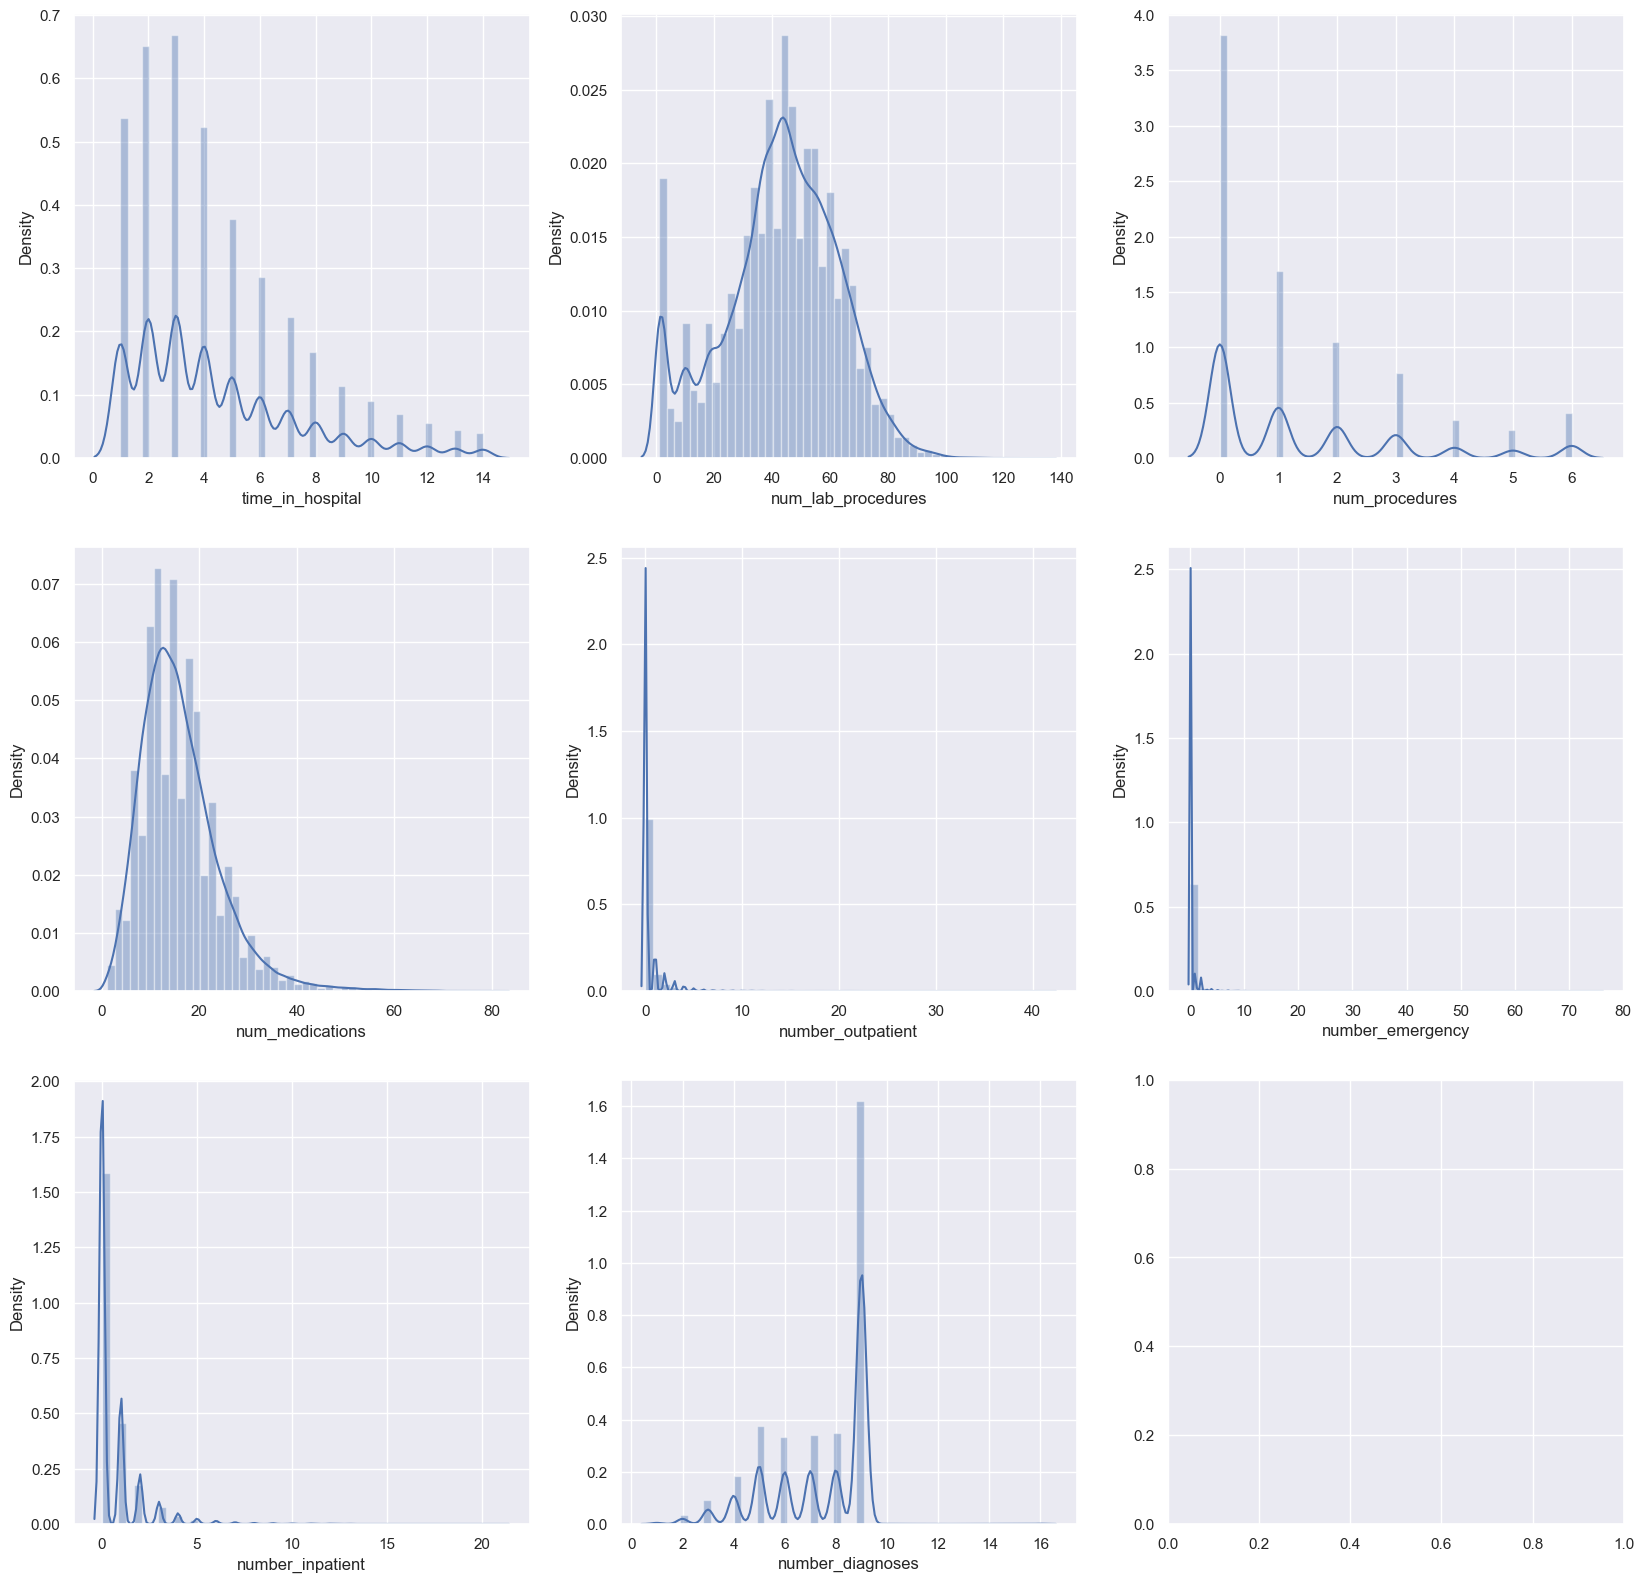

In [146]:
# numerical data - distribution

fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.distplot(X_train_1[num_col[i-1]])

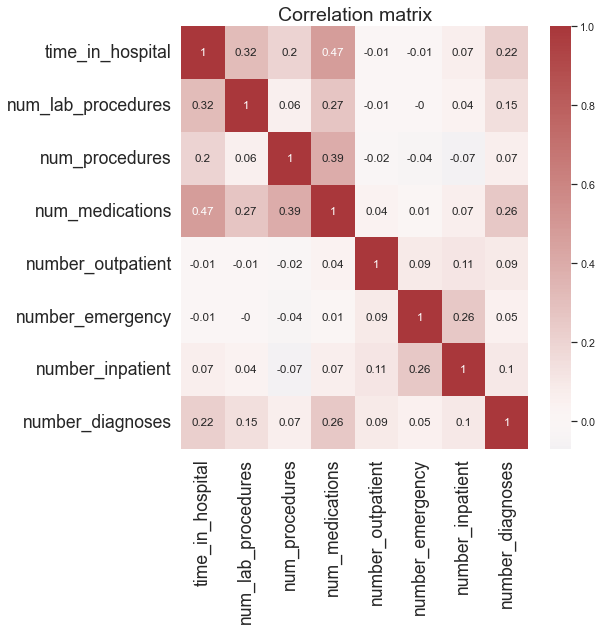

In [147]:
# heat map btw numerical data
plt.figure(figsize=(8,8),dpi = 70)
sns.heatmap(X_train_1[num_col].corr().round(2),
            xticklabels=num_col,
            yticklabels=num_col,
            cmap='vlag',center=0,annot=True)
plt.title('Correlation matrix',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=360)
plt.show()

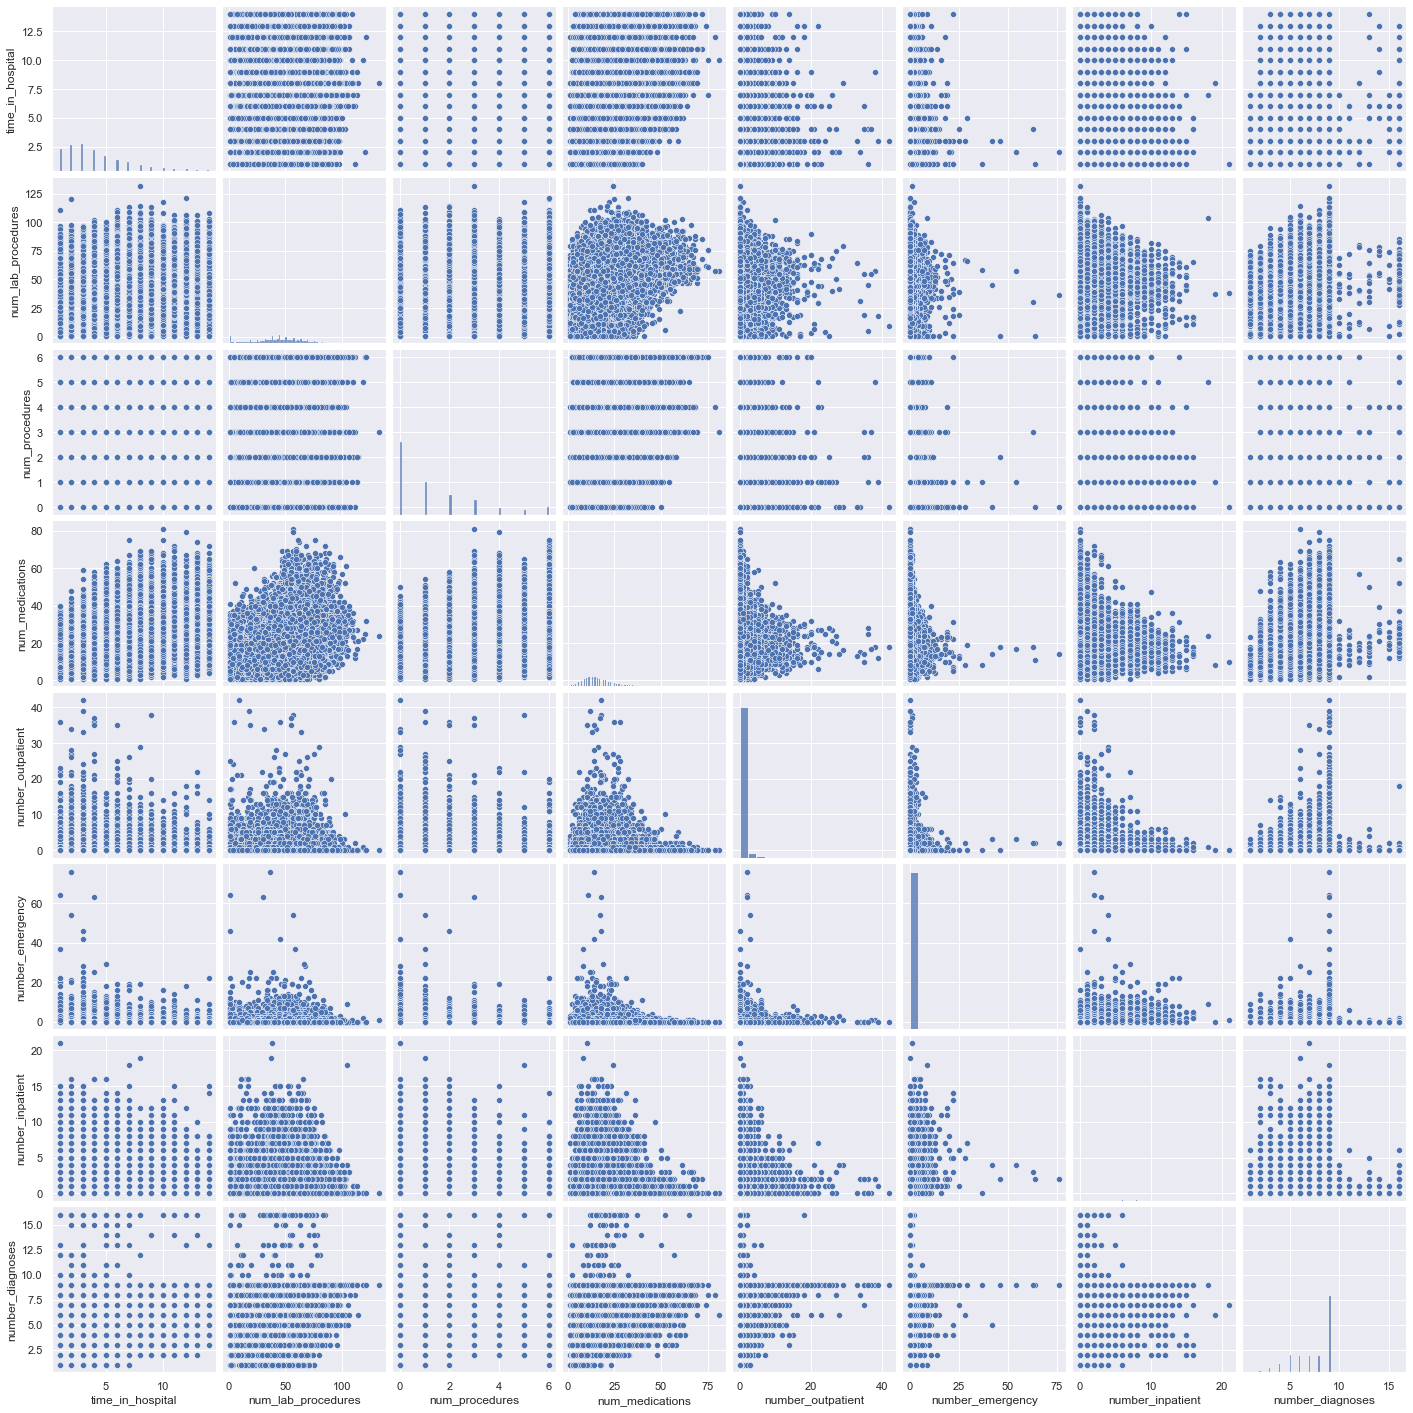

In [148]:
sns.pairplot(X_train_1[num_col])
plt.show()

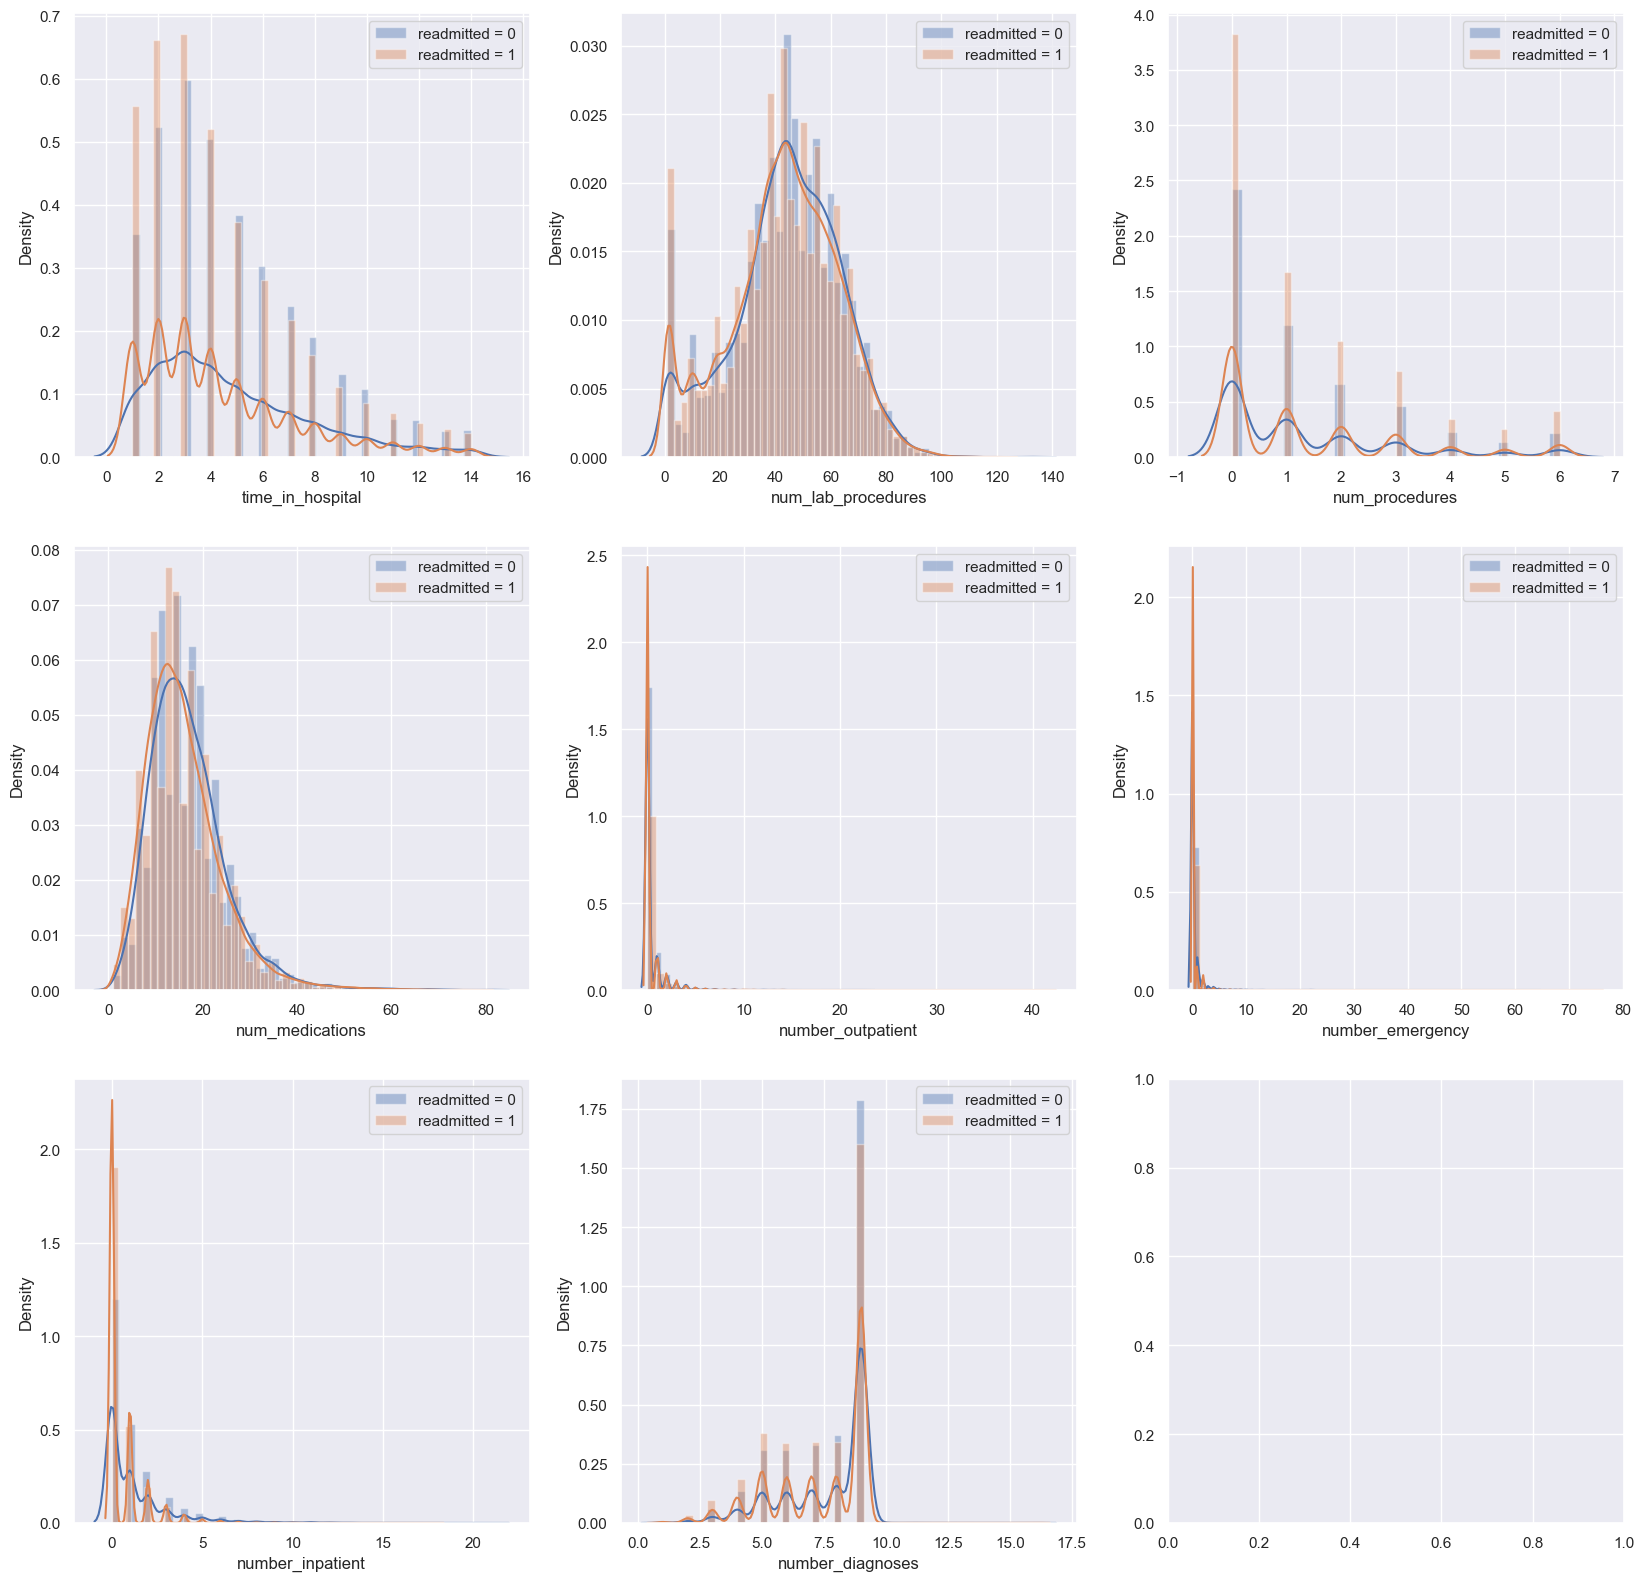

In [149]:
fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.distplot(X_train_1[num_col[i-1]][y_train_1==0],label = 'readmitted = 0')
    sns.distplot(X_train_1[num_col[i-1]][y_train_1==1],label = 'readmitted = 1')
    plt.legend()

In [150]:
from scipy import stats

# Feature engineering

In [151]:
X_train_1.shape,X_test_1.shape

((81412, 44), (20354, 44))

In [152]:
# concat train_test before feature engineering
train_test = pd.concat([X_train_1, X_test_1], axis=0)

In [153]:
def diag_code(data1, cols):
    for col in cols:
        data1.loc[(data1[col].str.contains("V")) | (data1[col].str.contains("E")), col] = 1000
        data1.loc[(data1[col]=='Unknown'), col] = 0
        data1[col] = data1[col].astype(np.float16)

    for col in cols:
        data1["diag"] = np.nan
        data1.loc[(data1[col]>=390) & (data1[col]<=459) | (data1[col]==785), "diag"] = "Circulatory"
        data1.loc[(data1[col]>=460) & (data1[col]<=519) | (data1[col]==786), "diag"] = "Respiratory"
        data1.loc[(data1[col]>=520) & (data1[col]<=579) | (data1[col]==787), "diag"] = "Digestive"
        data1.loc[(data1[col]>=250) & (data1[col]<251), "diag"] = "Diabetes"
        data1.loc[(data1[col]>=800) & (data1[col]<=999), "diag"] = "Injury"
        data1.loc[(data1[col]>=710) & (data1[col]<=739), "diag"] = "Muscoloskeletal"
        data1.loc[(data1[col]>=580) & (data1[col]<=629) | (data1[col] == 788), "diag"] = "Genitourinary"
        data1.loc[(data1[col]>=140) & (data1[col]<=239), "diag"] = "Neoplasms"
        

        data1["diag"] = data1["diag"].fillna("Other")
        data1[col] = data1["diag"]
        data1 = data1.drop("diag", axis=1)

    return data1

In [154]:
train_test = diag_code(train_test,["diag_1","diag_2","diag_3"])

In [155]:
train_test['diag_1'].value_counts()

Circulatory        30437
Other              18193
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6974
Genitourinary       5117
Muscoloskeletal     4957
Neoplasms           3433
Name: diag_1, dtype: int64

In [156]:
train_test['diag_2'].value_counts()

Circulatory        31881
Other              26911
Diabetes           12794
Respiratory        10895
Genitourinary       8376
Digestive           4170
Neoplasms           2547
Injury              2428
Muscoloskeletal     1764
Name: diag_2, dtype: int64

In [157]:
train_test['diag_3'].value_counts()

Other              30618
Circulatory        30306
Diabetes           17157
Respiratory         7358
Genitourinary       6680
Digestive           3930
Injury              1946
Muscoloskeletal     1915
Neoplasms           1856
Name: diag_3, dtype: int64

In [158]:
train_test.admission_type_id.value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [159]:
train_test['admission_type_id'].replace(1,'Emergency',inplace = True)
train_test['admission_type_id'].replace(2,'Urgent',inplace = True)
train_test['admission_type_id'].replace(3,'Elective',inplace = True)
train_test['admission_type_id'].replace(4,'Newborn',inplace = True)
train_test['admission_type_id'].replace(5,'Not Available',inplace = True)
train_test['admission_type_id'].replace(6,'NULL',inplace = True)
train_test['admission_type_id'].replace(7,'Trauma Center',inplace = True)
train_test['admission_type_id'].replace(8,'Not Mapped',inplace = True)

In [160]:
train_test.admission_type_id.value_counts()

Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [161]:
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=asource
# (17,20 - since no resources identifies code 17 and 20, they are considered as 'other')
train_test['admission_source_id'].replace(1, 'Referral', inplace=True)
train_test['admission_source_id'].replace(2, 'Referral', inplace=True)
train_test['admission_source_id'].replace(3, 'Referral', inplace=True)
train_test['admission_source_id'].replace(4, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(5, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(6, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(7, 'Emergency room', inplace=True)
train_test['admission_source_id'].replace(8, 'Court/Law enforcement', inplace=True)
train_test['admission_source_id'].replace(9, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(10, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(11, 'delivery', inplace=True)
train_test['admission_source_id'].replace(13, 'delivery', inplace=True)
train_test['admission_source_id'].replace(14, 'delivery', inplace=True)
train_test['admission_source_id'].replace(17, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(20, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(22, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(25, 'Transfer', inplace=True)

In [162]:
train_test['admission_source_id'].value_counts()

Emergency room           57494
Referral                 30856
Unknown                   7067
Transfer                  6328
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Transfer'),
  Text(1, 0, 'Referral'),
  Text(2, 0, 'Emergency room'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Court/Law enforcement'),
  Text(5, 0, 'delivery')])

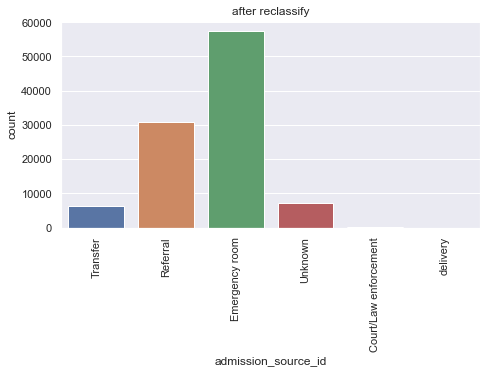

In [163]:
sns.countplot('admission_source_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [164]:
# 17-19 no resouces for code 17-19. replaced by unknown
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=dispuniform
train_test['discharge_disposition_id'].replace(1, 'Routine', inplace = True)
train_test['discharge_disposition_id'].replace(2, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(3, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(4, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(5, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(6, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(7, 'AMA', inplace = True)
train_test['discharge_disposition_id'].replace(8, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(9, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(10, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(11, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(12, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(13, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(14, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(15, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(16, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(17, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(18, 'NULL', inplace = True)
train_test['discharge_disposition_id'].replace(19, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(20, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(22, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(23, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(24, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(25, 'Not mapped', inplace = True)
train_test['discharge_disposition_id'].replace(27, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(28, 'Transfer_Other', inplace = True)

In [165]:
train_test['discharge_disposition_id'].value_counts()

Routine                60234
Transfer_Other         19418
HHC                    13010
NULL                    3691
Transfer_stHospital     2149
Expired                 1652
Not mapped               989
AMA                      623
Name: discharge_disposition_id, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Routine'),
  Text(1, 0, 'Transfer_Other'),
  Text(2, 0, 'Transfer_stHospital'),
  Text(3, 0, 'HHC'),
  Text(4, 0, 'NULL'),
  Text(5, 0, 'Not mapped'),
  Text(6, 0, 'Expired'),
  Text(7, 0, 'AMA')])

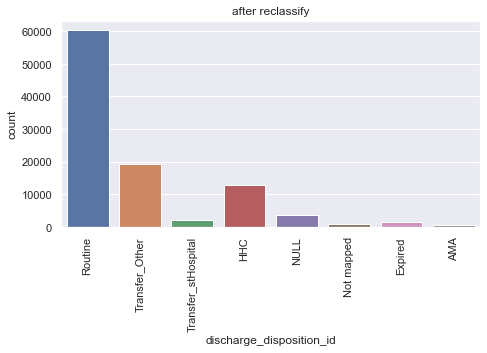

In [166]:
sns.countplot('discharge_disposition_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [167]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
               'miglitol', 'troglitazone', 'tolazamide', 'examide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
               'metformin-rosiglitazone', 'metformin-pioglitazone', 'citoglipton']

In [168]:
def use_or_not(data, col):
    maps = {'No': 0, 'Up': 1, 'Steady': 1, 'Down': 1}
    data['use_or_not'+col] = data[col].map(maps)

In [169]:
for i in medications:
    use_or_not(train_test,i)

In [170]:
medications_use_ornot=['use_or_not' + i for i in medications]

In [171]:
## new variable: the number of doses the patient take 
train_test ['number_24medications'] = np.zeros(train_test.shape[0])
for i in medications_use_ornot:
    train_test ['number_24medications'] = train_test['number_24medications'] + train_test[i]

In [172]:
for i in medications_use_ornot:
    del train_test[i]

In [173]:
def change_or_not(data,col):
    maps = {'No': 0, 'Up': 1, 'Steady': 0, 'Down': 1}
    data['change_or_not'+col] = data[col].map(maps)

In [174]:
for i in medications:
    change_or_not(train_test,i)

In [175]:
medications_change_or_not=['change_or_not' + i for i in medications]

In [176]:
## new variable: the number of changes of doses the patient take 
train_test ['number_change_24medications'] = np.zeros(train_test.shape[0])
for i in medications_change_or_not:
    train_test ['number_change_24medications'] = train_test['number_change_24medications'] + train_test[i]

In [177]:
for i in medications_change_or_not:
    del train_test[i]

In [178]:
for i in medications:
    del train_test[i]

In [179]:
num_col = train_test.columns[train_test.dtypes!=object]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object') 
 total number of numerical columns: 10


In [180]:
obj_col = train_test.columns[train_test.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 13


In [181]:
X_train_2 = train_test.iloc[:X_train_1.shape[0],:]
X_test_2 = train_test.iloc[X_train_1.shape[0]:,:]
X_train_2.shape, X_train_1.shape, X_test_2.shape, X_test_1.shape

((81412, 23), (81412, 44), (20354, 23), (20354, 44))

In [182]:
for i in obj_col:
    display(train_test[i].value_counts())
    print('-'*25,'\n')

Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

------------------------- 



Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

------------------------- 



[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

------------------------- 



Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

------------------------- 



Routine                60234
Transfer_Other         19418
HHC                    13010
NULL                    3691
Transfer_stHospital     2149
Expired                 1652
Not mapped               989
AMA                      623
Name: discharge_disposition_id, dtype: int64

------------------------- 



Emergency room           57494
Referral                 30856
Unknown                   7067
Transfer                  6328
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

------------------------- 



Circulatory        30437
Other              18193
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6974
Genitourinary       5117
Muscoloskeletal     4957
Neoplasms           3433
Name: diag_1, dtype: int64

------------------------- 



Circulatory        31881
Other              26911
Diabetes           12794
Respiratory        10895
Genitourinary       8376
Digestive           4170
Neoplasms           2547
Injury              2428
Muscoloskeletal     1764
Name: diag_2, dtype: int64

------------------------- 



Other              30618
Circulatory        30306
Diabetes           17157
Respiratory         7358
Genitourinary       6680
Digestive           3930
Injury              1946
Muscoloskeletal     1915
Neoplasms           1856
Name: diag_3, dtype: int64

------------------------- 



None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

------------------------- 



None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

------------------------- 



No    54755
Ch    47011
Name: change, dtype: int64

------------------------- 



Yes    78363
No     23403
Name: diabetesMed, dtype: int64

------------------------- 



In [183]:
X_train_2['gender'].value_counts()

Female             43848
Male               37561
Unknown/Invalid        3
Name: gender, dtype: int64

In [184]:
y_train_1 = y_train_1.drop(X_train_2[X_train_2['gender']=='Unknown/Invalid'].index)
X_train_2 = X_train_2.drop(X_train_2[X_train_2['gender']=='Unknown/Invalid'].index)

#### Transformation on numerical variables

In [186]:
X_train_2[num_col].skew()

time_in_hospital                1.127783
num_lab_procedures             -0.240424
num_procedures                  1.312903
num_medications                 1.337335
number_outpatient               8.836167
number_emergency               24.197236
number_inpatient                3.657859
number_diagnoses               -0.870623
number_24medications            0.680149
number_change_24medications     1.435999
dtype: float64

In [187]:
num_col

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object')

In [188]:
right_skewed = num_col[X_train_2[num_col].skew()>0]
right_skewed

Index(['time_in_hospital', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_24medications', 'number_change_24medications'],
      dtype='object')

In [189]:
def boxcox(column, data):
    if data[column].min()==0:
        data[column]=data[column]+1
    data['bc_'+column]=stats.boxcox(data[column])[0]

In [190]:
for i in right_skewed:
    boxcox(i, X_train_2)

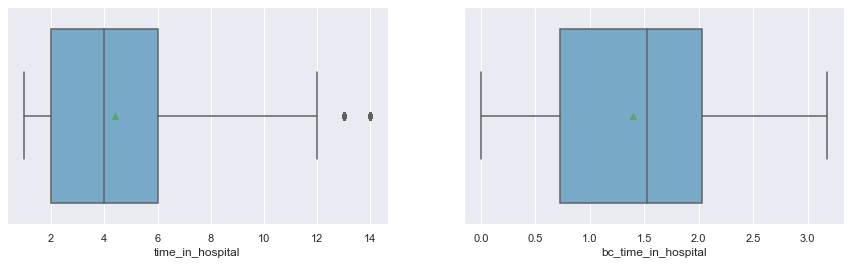

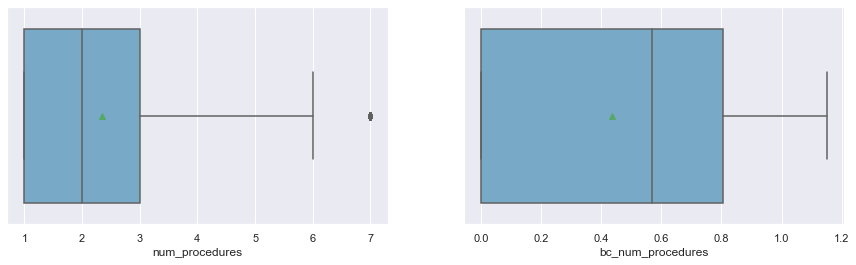

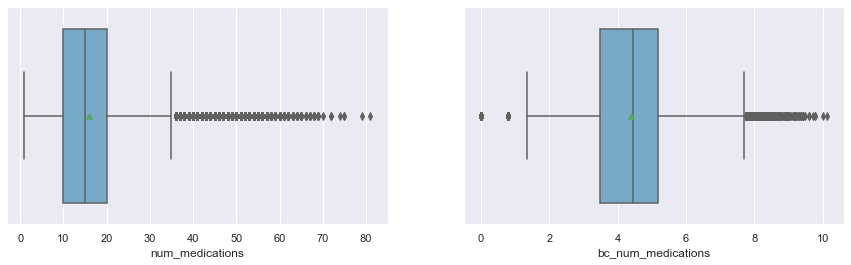

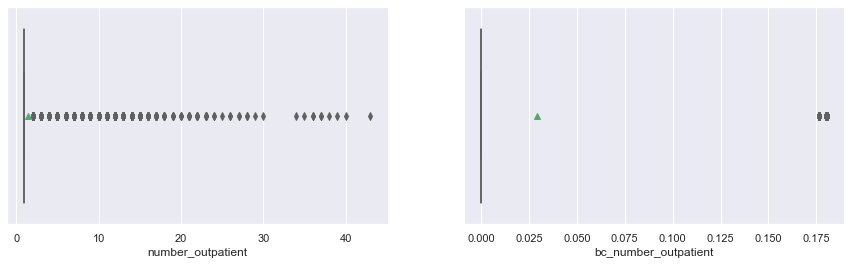

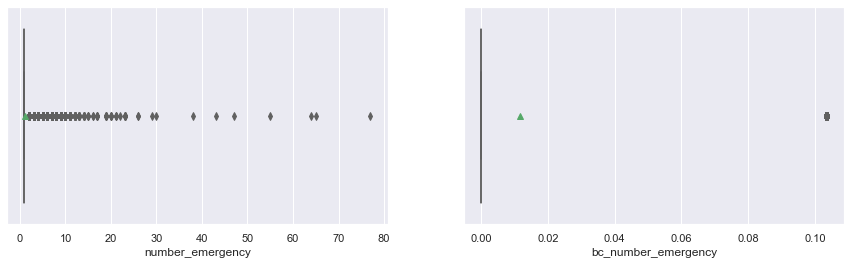

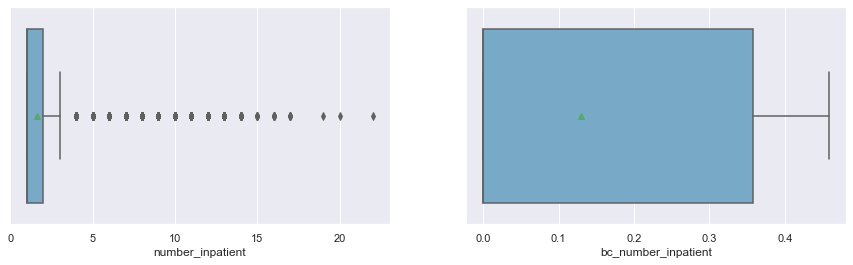

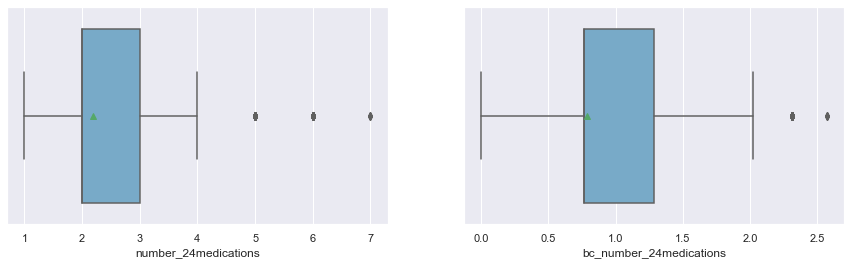

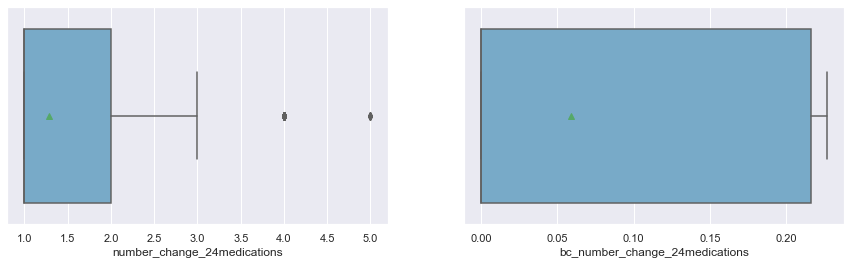

In [191]:
for i in right_skewed:
    fig, axes = plt.subplots(1,2,figsize = (15,4))
  
    sns.boxplot(i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[0])
    sns.boxplot('bc_'+i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[1])

In [192]:
len(X_train_2[X_train_2['bc_number_outpatient']>0.02])

13380

In [193]:
X_train_3 = X_train_2.drop(X_train_2[X_train_2['bc_number_outpatient']>0.02].index)

In [194]:
X_train_3.shape

(68029, 31)

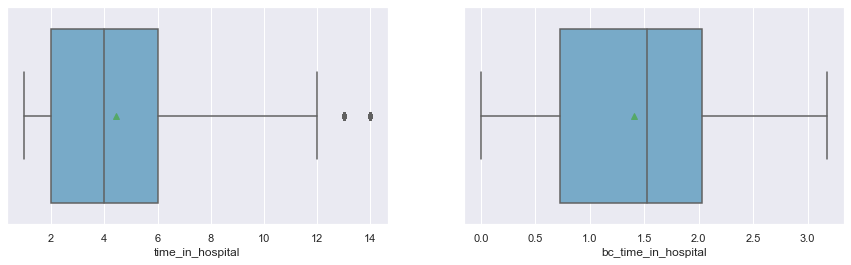

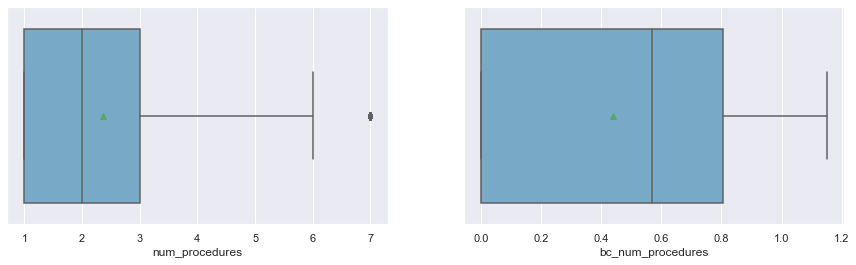

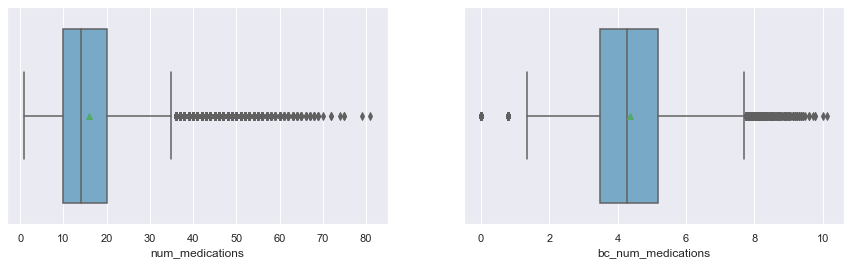

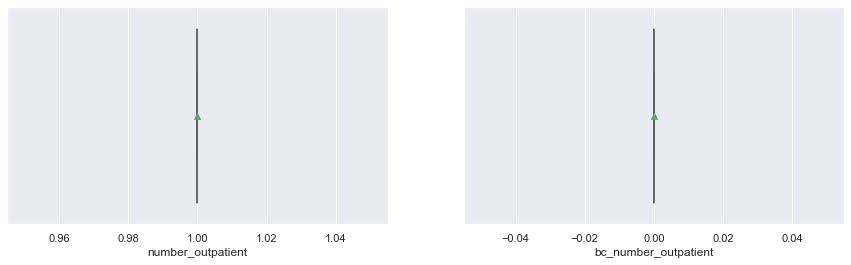

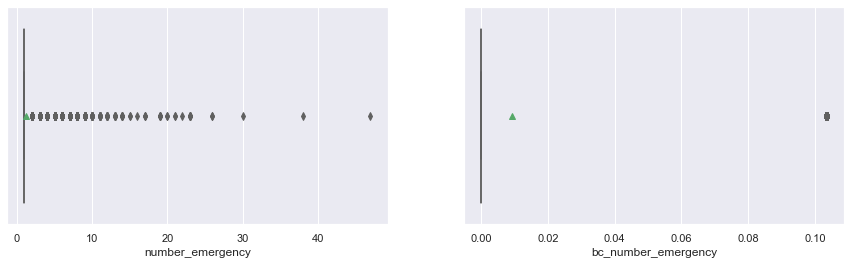

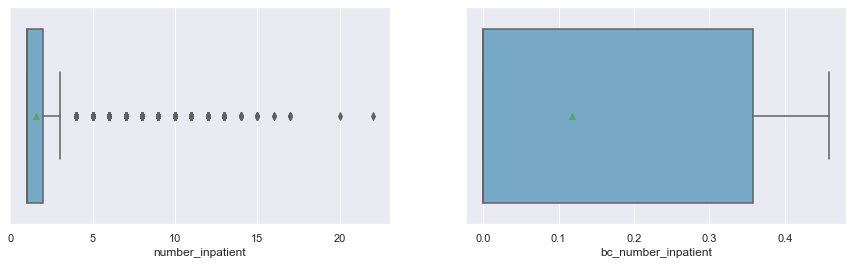

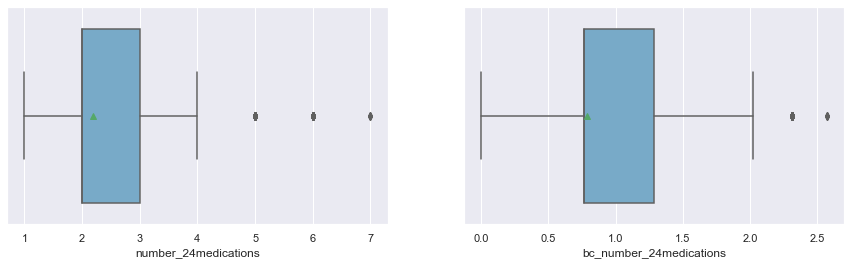

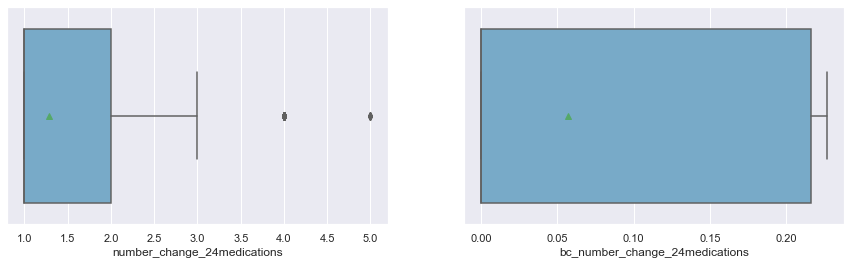

In [195]:
for i in right_skewed:
    fig, axes = plt.subplots(1,2,figsize = (15,4))
  
    sns.boxplot(i, data=X_train_3, palette='Blues', showmeans=True,ax=axes[0])
     
    sns.boxplot('bc_'+i, data=X_train_3, palette='Blues', showmeans=True,ax=axes[1])

In [196]:
len(X_train_2[X_train_2['bc_number_emergency']>0.1])

9181

In [197]:
X_train_3 = X_train_3.drop(X_train_3[X_train_3['bc_number_emergency']>0.1].index)

In [198]:
X_train_3['bc_number_outpatient'].value_counts()

0.0    61986
Name: bc_number_outpatient, dtype: int64

In [199]:
X_train_3['bc_number_emergency'].value_counts()

0.0    61986
Name: bc_number_emergency, dtype: int64

In [200]:
np.quantile(X_train_2['bc_num_medications'],[0.25,0.75])

array([3.48712203, 5.19085103])

In [201]:
quantile25 = np.quantile(X_train_2['bc_num_medications'],0.25)
quantile75 = np.quantile(X_train_2['bc_num_medications'],0.75)

In [202]:
len(X_train_2[X_train_2['bc_num_medications']<quantile25])

16355

In [203]:
len(X_train_2[X_train_2['bc_num_medications']>quantile75])

19152

In [204]:
y_train_1 = y_train_1.drop(X_train_2[X_train_2['bc_num_medications']<quantile25].index)
X_train_2 = X_train_2.drop(X_train_2[X_train_2['bc_num_medications']<quantile25].index)

In [205]:
y_train_1 = y_train_1.drop(X_train_2[X_train_2['bc_num_medications']>quantile75].index)
X_train_2 = X_train_2.drop(X_train_2[X_train_2['bc_num_medications']>quantile75].index)

In [206]:
y_train_1.shape

(45902,)

In [207]:
for i in right_skewed:
    boxcox(i, X_test_2)

In [208]:
for i in right_skewed:
    del X_train_2[i]
    del X_test_2[i]

In [209]:
del X_train_2['bc_number_emergency']
del X_test_2['bc_number_emergency']
del X_train_2['bc_number_outpatient']
del X_test_2['bc_number_outpatient']

In [210]:
for i in X_train_2.columns:
    if len(X_train_2[i].unique())==1:
        print(i)
        del X_train_2[i]
        del X_test_2[i]

In [211]:
train_test_2 = pd.concat([X_train_2,X_test_2], axis=0)

In [212]:
train_test_2['age'].values


array(['[40-50)', '[50-60)', '[40-50)', ..., '[60-70)', '[70-80)',
       '[60-70)'], dtype=object)

In [213]:
from sklearn import preprocessing
oe = preprocessing.OrdinalEncoder()
oe.fit(train_test_2['age'].values.reshape(-1, 1))
train_test_2['age_ordinal']=oe.transform(train_test_2['age'].values.reshape(-1, 1)).copy()

In [214]:
del train_test_2['age']

In [215]:
train_test_2.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'num_lab_procedures', 'diag_1', 'diag_2',
       'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'bc_time_in_hospital', 'bc_num_procedures',
       'bc_num_medications', 'bc_number_inpatient', 'bc_number_24medications',
       'bc_number_change_24medications', 'age_ordinal'],
      dtype='object')

In [216]:
train_test_2

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,diag_1,diag_2,diag_3,number_diagnoses,...,A1Cresult,change,diabetesMed,bc_time_in_hospital,bc_num_procedures,bc_num_medications,bc_number_inpatient,bc_number_24medications,bc_number_change_24medications,age_ordinal
24990,AfricanAmerican,Female,Emergency,Routine,Transfer,46,Injury,Other,Diabetes,5,...,>7,No,Yes,2.228491,0.000000,4.905422,0.000000,0.763310,0.000000,4.0
67555,Caucasian,Male,Elective,Routine,Referral,60,Other,Other,Diabetes,6,...,None,Ch,Yes,2.705037,0.567603,4.264329,0.000000,0.763310,0.216257,5.0
89978,Caucasian,Male,Elective,Routine,Referral,39,Other,Diabetes,Circulatory,6,...,Norm,No,No,0.726959,0.000000,4.264329,0.000000,0.000000,0.000000,4.0
90748,AfricanAmerican,Female,Urgent,Transfer_Other,Emergency room,80,Digestive,Circulatory,Other,9,...,None,Ch,Yes,2.029598,0.000000,5.050622,0.417329,0.763310,0.216257,6.0
54643,AfricanAmerican,Female,Elective,Routine,Referral,66,Other,Other,Diabetes,9,...,None,Ch,Yes,0.000000,1.034128,4.264329,0.000000,0.763310,0.216257,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58668,Caucasian,Male,Emergency,AMA,Emergency room,57,Respiratory,Respiratory,Circulatory,7,...,None,No,Yes,0.724642,0.000000,3.064635,0.000000,0.760422,0.000000,7.0
24866,Caucasian,Male,Emergency,Routine,Emergency room,44,Respiratory,Respiratory,Diabetes,7,...,Norm,No,Yes,2.012522,0.000000,5.452116,0.000000,0.760422,0.000000,4.0
28929,Caucasian,Male,Not Available,Routine,Unknown,18,Respiratory,Other,Diabetes,7,...,None,No,No,0.724642,0.000000,3.546950,0.000000,0.000000,0.000000,6.0
43837,AfricanAmerican,Female,Emergency,HHC,Transfer,44,Injury,Injury,Circulatory,9,...,None,Ch,Yes,2.380591,0.801174,7.183484,0.000000,2.004142,0.220888,7.0


In [217]:
train_test_new = pd.get_dummies(train_test_2)

In [218]:
X_train_3 = train_test_new.iloc[:X_train_2.shape[0],:]
X_test_3 = train_test_new.iloc[X_train_2.shape[0]:,:]
X_train_2.shape, X_train_3.shape, X_test_2.shape, X_test_3.shape

((45902, 21), (45902, 77), (20354, 21), (20354, 77))

### Handling class imbalance

In [219]:
X_train_3

,num_lab_procedures,number_diagnoses,bc_time_in_hospital,bc_num_procedures,bc_num_medications,bc_number_inpatient,bc_number_24medications,bc_number_change_24medications,age_ordinal,race_AfricanAmerican,...,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
24990,46,5,2.228491,0.000000,4.905422,0.000000,0.763310,0.000000,4.0,1,...,1,0,1,0,0,0,0,1,0,1
67555,60,6,2.705037,0.567603,4.264329,0.000000,0.763310,0.216257,5.0,0,...,1,0,0,0,1,0,1,0,0,1
89978,39,6,0.726959,0.000000,4.264329,0.000000,0.000000,0.000000,4.0,0,...,1,0,0,0,0,1,0,1,1,0
90748,80,9,2.029598,0.000000,5.050622,0.417329,0.763310,0.216257,6.0,1,...,1,0,0,0,1,0,1,0,0,1
54643,66,9,0.000000,1.034128,4.264329,0.000000,0.763310,0.216257,1.0,1,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65260,79,9,0.726959,0.000000,4.085466,0.000000,0.763310,0.000000,6.0,0,...,1,0,1,0,0,0,0,1,0,1
44777,30,7,0.726959,0.942829,5.190851,0.000000,0.763310,0.000000,7.0,0,...,1,0,0,0,1,0,0,1,0,1
100437,57,6,1.525975,0.805664,3.487122,0.000000,0.000000,0.000000,9.0,0,...,0,1,0,0,1,0,0,1,1,0
61510,35,6,2.404191,0.805664,4.085466,0.000000,1.281796,0.000000,8.0,1,...,1,0,0,0,1,0,1,0,0,1


In [220]:
cat_index = []
for i in range(len(X_train_3.columns)):
    if X_train_3.iloc[:,i].dtype=='uint8':
        cat_index.append(i)
len(cat_index)

68

In [221]:
from imblearn.over_sampling import SMOTENC
smnc = SMOTENC(categorical_features = cat_index,random_state=41,sampling_strategy = 'minority')

SMOTE_X, SMOTE_y = smnc.fit_resample(X_train_3, y_train_1)

In [222]:
SMOTE_X.shape,SMOTE_y.shape

((81408, 77), (81408,))

In [223]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(SMOTE_X)

# normalize
X_train_4  = scaler.transform(SMOTE_X)
X_test_4 = scaler.transform(X_test_3)

In [224]:
X_train_4.shape,X_test_4.shape

((81408, 77), (20354, 77))

In [225]:
### normalize+remove low-variance features
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.98 * (1 - .98)))
sel.fit(SMOTE_X)
X_train_5 = sel.transform(SMOTE_X)
X_test_5 = sel.transform(X_test_3)

In [226]:
X_train_5.shape,X_test_5.shape

((81408, 54), (20354, 54))

In [227]:
from sklearn import feature_selection 
mi = feature_selection.mutual_info_classif(X_train_4, SMOTE_y, discrete_features='auto', 
                                              n_neighbors=5, copy=True, 
                                              random_state=41)

In [228]:
mi = pd.DataFrame(mi,columns = ['mutual info'])
mi['variable'] = X_train_3.columns

In [229]:
mi = mi.sort_values(by = 'mutual info',ascending = False)

In [230]:
mi

,mutual info,variable
4,0.370062,bc_num_medications
2,0.301312,bc_time_in_hospital
5,0.254035,bc_number_inpatient
3,0.222332,bc_num_procedures
6,0.166067,bc_number_24medications
...,...,...
66,0.000000,max_glu_serum_>300
20,0.000000,admission_type_id_Not Available
30,0.000000,discharge_disposition_id_Transfer_Other
22,0.000000,admission_type_id_Trauma Center


In [231]:
len(mi[mi['mutual info']>0.015])

12

In [232]:
select_fea = mi[mi['mutual info']>0.015]['variable']

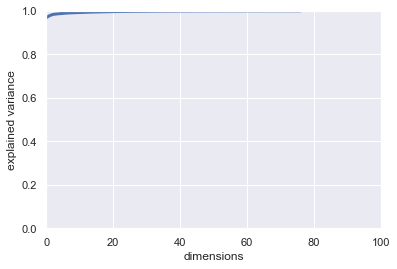

In [233]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(SMOTE_X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Plot the explained variance vs number of dimensions
plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1])
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

In [234]:
# pca after normalize
pca = PCA(n_components=0.99).fit(SMOTE_X)

X_train_pca = pca.transform(SMOTE_X)
X_test_pca = pca.transform(X_test_3)

In [235]:
X_train_pca.shape,X_test_pca.shape

((81408, 8), (20354, 8))

In [236]:
X_train_4 = pd.DataFrame(X_train_4,columns = X_train_3.columns)
X_test_4 = pd.DataFrame(X_test_4, columns = X_train_3.columns)

In [237]:
X_train_4[select_fea]

,bc_num_medications,bc_time_in_hospital,bc_number_inpatient,bc_num_procedures,bc_number_24medications,bc_number_change_24medications,age_ordinal,A1Cresult_None,diag_1_Respiratory,diag_3_Diabetes,admission_type_id_Urgent,diag_2_Respiratory
0,0.832468,0.701591,0.000000,0.000000,0.296976,0.000000,0.444444,0.0,0.0,1.0,0.0,0.0
1,0.456180,0.851621,0.000000,0.493258,0.296976,0.953624,0.555556,1.0,0.0,1.0,0.0,0.0
2,0.456180,0.228867,0.000000,0.000000,0.000000,0.000000,0.444444,0.0,0.0,0.0,0.0,0.0
3,0.917693,0.638974,0.909611,0.000000,0.296976,0.953624,0.666667,1.0,0.0,0.0,1.0,0.0
4,0.456180,0.000000,0.000000,0.898677,0.296976,0.953624,0.111111,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81403,0.707392,0.590651,0.000000,0.467416,0.296976,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0
81404,0.311824,0.000000,0.165014,0.000000,0.296976,0.000000,0.685921,1.0,0.0,0.0,0.0,0.0
81405,0.822635,0.511167,0.000000,0.544729,0.296976,0.106050,0.777778,1.0,0.0,0.0,0.0,0.0
81406,0.637263,0.330897,0.463509,0.000000,0.296976,0.000000,0.888889,1.0,0.0,0.0,0.0,0.0


# Modelling

In [238]:
def clf(classifier,X_train, y_train, X_test, y_test):
    clf = classifier.fit(X_train, y_train)
    clf_train_acc = clf.score(X_train, y_train).round(4)
    clf_test_acc = clf.score(X_test, y_test).round(4)
    y_pred = clf.predict(X_test)
    clf_test_precision = metrics.precision_score(y_test, y_pred).round(4)
    clf_test_recall = metrics.recall_score(y_test, y_pred).round(4)
    clf_test_F1 = metrics.f1_score(y_test, y_pred).round(4)
    clf_test_bal_acc = metrics.balanced_accuracy_score(y_test, y_pred).round(4)
    clf_test_auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]).round(4)
    report = metrics.confusion_matrix(y_test, y_pred)
    scores = [clf_test_acc,clf_test_precision,clf_test_recall,clf_test_F1,clf_test_bal_acc,clf_test_auc]
    return report,scores

### Logit regression

In [239]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.3, l1_ratio=0.7, penalty='elasticnet', random_state=41,
                   solver='saga')
lr_report, lr_scores = clf(lr, X_train_4[select_fea],SMOTE_y,X_test_4[select_fea],y_test_1)
print('test scores:',lr_scores)
print('confusion matrix:\n',lr_report)


test scores: [0.5978, 0.9045, 0.6119, 0.73, 0.5489, 0.5764]
confusion matrix:
 [[ 1104  1168]
 [ 7018 11064]]


### Random forest

In [240]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,max_depth=1,random_state = 41)
rf_report, rf_scores = clf(rf, X_train_4[select_fea],SMOTE_y,X_test_4[select_fea],y_test_1)
print('test scores:',rf_scores)
print('confusion matrix:\n',rf_report)

test scores: [0.6971, 0.9115, 0.73, 0.8107, 0.5828, 0.6039]
confusion matrix:
 [[  990  1282]
 [ 4883 13199]]


### Naive Bayes

In [241]:
from sklearn import naive_bayes

nb = naive_bayes.ComplementNB(alpha=1, fit_prior=True, class_prior=None)
nb_report, nb_scores = clf(nb, X_train_4[select_fea],SMOTE_y,X_test_4[select_fea],y_test_1)
print('test scores:',nb_scores)
print('confusion matrix:\n',nb_report)

test scores: [0.4863, 0.8954, 0.4776, 0.6229, 0.5167, 0.5635]
confusion matrix:
 [[1263 1009]
 [9446 8636]]


### GradientBoostingClassifier

In [242]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=41)
gb_report, gb_scores = clf(gb, X_train_4[select_fea],SMOTE_y,X_test_4[select_fea],y_test_1)
print('test scores:',rf_scores)
print('confusion matrix:\n',rf_report)

test scores: [0.6971, 0.9115, 0.73, 0.8107, 0.5828, 0.6039]
confusion matrix:
 [[  990  1282]
 [ 4883 13199]]


### CNN

In [243]:
input_feature = X_train_4[select_fea].shape[1]
X_train_4_array = np.array(X_train_4[select_fea])
X_test_4_array = np.array(X_test_4[select_fea])

X_train_5 = X_train_4_array.reshape(X_train_4[select_fea].shape[0], input_feature,1)
X_test_5 = X_test_4_array.reshape(X_test_4[select_fea].shape[0],input_feature,1)
SMOTE_y_array=np.array(SMOTE_y)
y_test_1_array = np.array(y_test_1)

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow.keras as keras
model = keras.Sequential()
 
model.add(Conv1D(32, 3, activation='relu', padding = 'same', input_shape = (input_feature,1)))
model.add(MaxPooling1D())
model.add(Conv1D(64, 3, activation='relu', padding = 'same'))
model.add(MaxPooling1D())
model.add(Conv1D(128, 3, activation='relu', padding = 'same'))
model.add(MaxPooling1D())
          
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

epoch_num = 3
model.fit(X_train_5, SMOTE_y_array, 
              epochs=epoch_num,
              validation_data = (X_test_5, y_test_1_array))

predict_y = (model.predict(X_test_5) > 0.5).astype("int32")

report = metrics.classification_report(y_test_1_array, predict_y)
print(report)

cnn_precision = metrics.precision_score(y_test_1, predict_y)
cnn_recall = metrics.recall_score(y_test_1, predict_y)
cnn_f1 = metrics.f1_score(y_test_1, predict_y)
cnn_bal = metrics.balanced_accuracy_score(y_test_1, predict_y)
cnn_auc = metrics.roc_auc_score(y_test_1, predict_y)

Epoch 1/3
2544/2544 [==============================] - 29s 9ms/step - loss: 0.4615 - accuracy: 0.7680 - val_loss: 0.5044 - val_accuracy: 0.8255
Epoch 2/3
2544/2544 [==============================] - 24s 9ms/step - loss: 0.3976 - accuracy: 0.8024 - val_loss: 0.5757 - val_accuracy: 0.8651
Epoch 3/3
2544/2544 [==============================] - 20s 8ms/step - loss: 0.3858 - accuracy: 0.8096 - val_loss: 0.7435 - val_accuracy: 0.8210
              precision    recall  f1-score   support

           0       0.18      0.16      0.17      2272
           1       0.90      0.90      0.90     18082

    accuracy                           0.82     20354
   macro avg       0.54      0.53      0.53     20354
weighted avg       0.82      0.82      0.82     20354



## XGBoosting

In [244]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

tuned_param = {'learning_rate': 0.1,
               'max_depth': 3,
               'colsample_bytree': 0.5,
               'subsample': 1.0,
               'min_child_weight': 1,
               'n_estimators': 250, 
               'random_state': 41,
               'booster': 'gbtree',
               'objective': "binary:logistic"}

dtrain = xgb.DMatrix(X_train_4, label = SMOTE_y)
dtest = xgb.DMatrix(X_test_4, label = y_test_1)
xbst2 = xgb.train(params = tuned_param,
                   dtrain = dtrain,
                   num_boost_round = 200,
                   evals = [(dtest, 'eval'), (dtrain, 'train')],
                   verbose_eval = 30)
pred2 = xbst2.predict(dtest)
pred2 = np.where(pred2 > 0.5, 1, 0)

confusion_matrix2 = confusion_matrix(y_test_1, pred2)
print(confusion_matrix2)
report2 = classification_report(y_test_1, pred2)
print(report2)

[22:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-logloss:0.67663	train-logloss:0.67205
[30]	eval-logloss:0.57430	train-logloss:0.42252
[60]	eval-logloss:0.59044	train-logloss:0.35031
[90]	eval-logloss:0.60338	train-logloss:0.30838
[120]	eval-logloss:0.58526	train-logloss:0.28623
[150]	eval-logloss:0.58588	tr

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

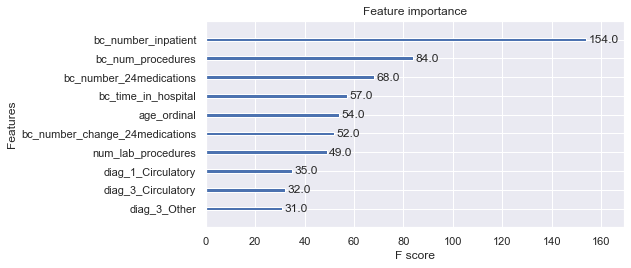

In [245]:
#plot importances
xgb.plot_importance(xbst2, max_num_features = 10)

In [246]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, accuracy_score
# accuracy: (tp + tn) / (p + n)
xgb_accuracy = accuracy_score(y_test_1, pred2)
print('xgb_accuracy: %f' % xgb_accuracy)
# precision tp / (tp + fp)
xgb_precision = precision_score(y_test_1, pred2)
print('xgb_precision : %f' % xgb_precision)
# recall: tp / (tp + fn)
xgb_recall = recall_score(y_test_1, pred2)
print('xgb_recall: %f' % xgb_recall)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f1 = f1_score(y_test_1,pred2)
print('xgb_f1: %f' % xgb_f1)
xgb_bal = metrics.balanced_accuracy_score(y_test_1, pred2)
print('xgb_bal: %f' % xgb_bal)
xgb_auc = metrics.roc_auc_score(y_test_1, pred2)
print('xgb_auc: %f' % xgb_auc)

xgb_accuracy: 0.657610
xgb_precision : 0.907458
xgb_recall: 0.684382
xgb_f1: 0.780289
xgb_bal: 0.564462
xgb_auc: 0.564462


## SVM

In [247]:
from sklearn import svm  
from sklearn.svm import SVC
#Create a svm Classifier with best parameters combination
svm= svm.SVC(kernel='rbf', C=100, gamma=1, random_state=41).fit(X_train_4[select_fea],SMOTE_y)
#Predict the response for test dataset
y_pred= svm.predict(X_test_4[select_fea])
# print classification report
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.11      0.14      2272
           1       0.89      0.94      0.91     18082

    accuracy                           0.84     20354
   macro avg       0.54      0.52      0.53     20354
weighted avg       0.81      0.84      0.83     20354



In [248]:
svm_bal=metrics.balanced_accuracy_score(y_test_1, y_pred)
svm_pre=metrics.precision_score(y_test_1, y_pred)
svm_rec=metrics.recall_score(y_test_1, y_pred)
svm_f1=metrics.f1_score(y_test_1, y_pred)
svm_auc=metrics.roc_auc_score(y_test_1, y_pred)
print("Balanced Accuracy:",svm_bal)
print("Precision:",svm_pre)
print("Recall:",svm_rec)
print("f1:",svm_f1)
print("auc:",svm_auc)

Balanced Accuracy: 0.524508508578292
Precision: 0.8936024090020603
Recall: 0.935460679128415
f1: 0.914052578963011
auc: 0.524508508578292


## Voting ensemble

In [249]:
# from sklearn.ensemble import VotingClassifier

# rf = RandomForestClassifier(n_estimators = 100,max_depth=1,random_state = 41)
# gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=41)

# ve = VotingClassifier(
#         estimators=[('rf', rf), ('gb', gb)],
#         voting='soft', weights=[.4, .6]
#     )

# ve_report, ve_scores = clf(ve, X_train_4[select_fea],SMOTE_y,X_test_4[select_fea],y_test_1)
# print('test scores:',ve_scores)
# print('confusion matrix:\n',ve_report)

# Evaluation

In [250]:
# precision
precision = [lr_scores[1],rf_scores[1],nb_scores[1],gb_scores[1], cnn_precision, xgb_precision, svm_pre]
precision = pd.DataFrame(precision, index = ['Logistic Regression','Random Forest','Naive Bayes','Gradient Boosting', 'CNN', 'XGB','SVM'], columns = ['precision'])

# recall
recall = [lr_scores[2],rf_scores[2],nb_scores[2],gb_scores[2], cnn_recall, xgb_recall,svm_rec]
recall = pd.DataFrame(recall, index = ['Logistic Regression','Random Forest','Naive Bayes','Gradient Boosting', 'CNN', 'XGB','SVM'], columns = ['recall'])

# F1
F1 = [lr_scores[3],rf_scores[3],nb_scores[3],gb_scores[3],cnn_f1, xgb_f1,svm_f1]
F1 = pd.DataFrame(F1, index = ['Logistic Regression','Random Forest','Naive Bayes','Gradient Boosting','CNN', 'XGB','SVM'], columns = ['F1'])

# balanced accuracy
bal_acc = [lr_scores[4],rf_scores[4],nb_scores[4],gb_scores[4],cnn_bal,xgb_bal,svm_bal]
bal_acc = pd.DataFrame(bal_acc, index = ['Logistic Regression','Random Forest','Naive Bayes','Gradient Boosting','CNN', 'XGB','SVM'], columns = ['balanced accuracy'])

# auc
auc = [lr_scores[5],rf_scores[5],nb_scores[5],gb_scores[5],cnn_auc,xgb_auc,svm_auc]
auc = pd.DataFrame(auc, index = ['Logistic Regression','Random Forest','Naive Bayes','Gradient Boosting','CNN', 'XGB','SVM'], columns = ['AUC'])

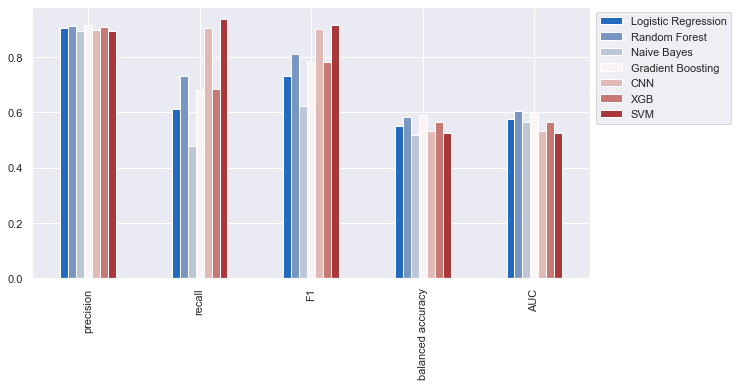

In [251]:
all_eva = pd.concat([precision,recall,F1,bal_acc,auc],axis = 1).T
all_eva.plot(y = all_eva.columns,kind = 'bar',figsize = (10,5),colormap = 'vlag')
plt.legend(bbox_to_anchor=(1,1))